In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sympy as sy

In [ ]:
N=10000000
x = np.random.uniform(0,1, N)

In [4]:
def f(a, b, x):
  return ((np.math.factorial((a+b)-1))/(np.math.factorial(a-1)*\
          np.math.factorial(b-1)))*(x**(a-1))*((1-x)**(b-1))

In [5]:
#Para verificar que la función es correcta
#Para alfa=2, beta=4, x=0.3 se espera 2.048
f(2,4,0.2)

2.0480000000000005

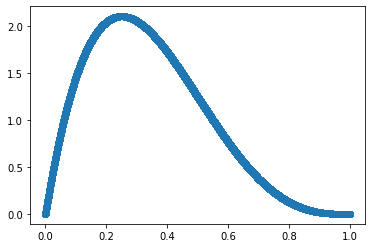

In [ ]:
plt.scatter(x, f(2,4,x))

In [ ]:
#Para calcular el máximo valor del rango
def v_max(a,b):
  return (a-1)/(a+b-2)

def maximo(a,b):
  return f(a,b,v_max(a,b))


In [ ]:
maximo(2,4) #Se verificó que este valor fuese correcto

2.109375

In [ ]:
lim_s=100
y= np.random.uniform(0,lim_s,N)

In [ ]:
a=2
b=4

Sample = np.zeros(len(y))
incert=0.01

for i in tqdm(range(0, len(y))):
  if y[i]<= (f(a,b,x[i])*(1+incert)) or y[i]<= (f(a,b,x[i])*(1-incert)):
    Sample[i]=y[i]

100%|██████████| 10000000/10000000 [00:48<00:00, 206738.78it/s]


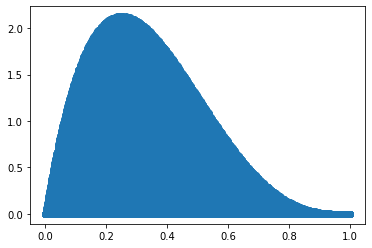

In [ ]:
plt.scatter(x, Sample)

In [ ]:
#Integral con Monte Carlo
puntos=np.count_nonzero(Sample)
total=N
area=(puntos/total)*lim_s
print("El área bajo la curva es (aproximadamente):", area)

#Integral con SciPy
x = sy.Symbol("x")
integral=sy.integrate(f(a, b, x), (x, 0, 1))
print("El área bajo la curva es (exacta):", integral)

El área bajo la curva es (aproximadamente): 1.00746
El área bajo la curva es (exacta): 1.00000000000000


Nótese que la incertidumbre de 1%, es decir, el valor de la integral aproximada por Monte Carlo (*método de aceptación y rechazo*)  $\pm$ 0.01, abarca el valor exacto (1) para el $\alpha$ (2) y $\beta$ (4) dados. Otra forma de verlo es que el valor aproximado del área bajo la curva está entre 0.99 y 1.01. Cabe resaltar que esto puede variar para algunas iteraciones del programa, ya que depende del conjunto de valores pseudo-aleatorios y estos varían en cada ejecución.